In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny.cfg")

In [3]:
classes=[]
with open("/content/coco.names",'r') as f:
  classes=f.read().splitlines()
len(classes)

80

In [53]:
img = cv2.imread('/content/tt.jpeg')
blob= cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB= True, crop = False)

In [54]:
blob.shape

(1, 3, 320, 320)

In [56]:
yolo.setInput(blob)

In [57]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput= yolo.forward(output_layes_name)

In [65]:
boxes =[]
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[:]
    class_id= np.argmax(score)
    confidence= score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*320)
      center_x = int(detection[0]*320)
      w = int(detection[0]*320)
      h = int(detection[0]*320)

      x= int(center_x - w/2)
      y = int(center_x - h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)





  

In [66]:
len(boxes)

825

In [67]:
indexes= cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [68]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes),3))

In [69]:
for i  in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
  cv2.putText(img, label + " "+ confi, (x,y+20),font, 2, (255,255,255) , 2)

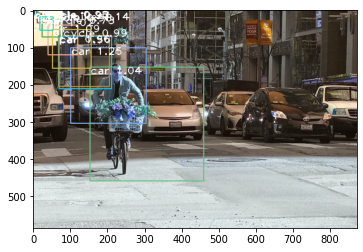

In [70]:
plt.imshow(img)

In [71]:
cv2.imwrite('./img2.jpg', img)

True